<a href="https://colab.research.google.com/github/speacock103/MachineLearningFall2020/blob/master/TitanicDecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [77]:
import io
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data

Grab Titanic Dataset

In [78]:
from google.colab import files
uploaded = files.upload()

titanic_train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
titanic_test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

Saving test.csv to test (6).csv
Saving train.csv to train (6).csv


Preprocess dataset (remove features not to be used and properly format others)

Features to remove: Passenger ID, Name, Ticket, Cabin

Features to format: Sex, Age, Embarked

In [79]:
titanic_train = titanic_train.drop("PassengerId", axis=1)
titanic_train = titanic_train.drop("Name", axis=1)
titanic_train = titanic_train.drop("Ticket", axis=1)
titanic_train = titanic_train.drop("Cabin", axis=1)

In [80]:
titanic_test = titanic_test.drop("PassengerId", axis=1)
titanic_test = titanic_test.drop("Name", axis=1)
titanic_test = titanic_test.drop("Ticket", axis=1)
titanic_test = titanic_test.drop("Cabin", axis=1)

In [81]:
sex = {"male": 0, "female": 1}
data = [titanic_train, titanic_test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(sex)

In [82]:
import random as rd

age_mean = np.mean(titanic_train.Age)
age_std = np.std(titanic_train.Age)
minus = age_mean - age_std
plus = age_mean + age_std

for row in titanic_train.loc[titanic_train.Age.isnull(), 'Age'].index:
    titanic_train.at[row, 'Age'] = rd.randint(int(minus), int(plus))

for row in titanic_test.loc[titanic_test.Age.isnull(), 'Age'].index:
    titanic_test.at[row, 'Age'] = rd.randint(int(minus), int(plus))

In [83]:
port = {"S": 0, "C": 1, "Q": 2}
portdata = [titanic_train, titanic_test]

for dataset in portdata:
    dataset['Embarked'] = dataset['Embarked'].map(port)

Embarkedtop = titanic_train.Embarked.mode()
for row in titanic_train.loc[titanic_train.Embarked.isnull(), 'Embarked'].index:
    titanic_train.at[row, 'Embarked'] = Embarkedtop

Embarkedtoptest = titanic_test.Embarked.mode()
for row in titanic_test.loc[titanic_test.Embarked.isnull(), 'Embarked'].index:
    titanic_test.at[row, 'Embarked'] = Embarkedtoptest

In [84]:
Faretop = titanic_train.Fare.mode()
for row in titanic_train.loc[titanic_train.Fare.isnull(), 'Fare'].index:
    titanic_train.at[row, 'Fare'] = Faretop
  
Faretoptest = titanic_test.Fare.mode()
for row in titanic_test.loc[titanic_test.Fare.isnull(), 'Fare'].index:
    titanic_test.at[row, 'Fare'] = Faretoptest

In [85]:
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0.0
887,1,1,1,19.0,0,0,30.0000,0.0
888,0,3,1,17.0,1,2,23.4500,0.0
889,1,1,0,26.0,0,0,30.0000,1.0


In [86]:
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0.0
887,1,1,1,19.0,0,0,30.0000,0.0
888,0,3,1,17.0,1,2,23.4500,0.0
889,1,1,0,26.0,0,0,30.0000,1.0


In [87]:
titanic_trainrev = titanic_train.drop("Survived", axis=1)
survival_train = titanic_train["Survived"]

In [88]:
titanic_trainrev.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Using titanic data to create a Decision Tree

In [89]:
dt = DecisionTreeClassifier()
dt.fit(titanic_trainrev, survival_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

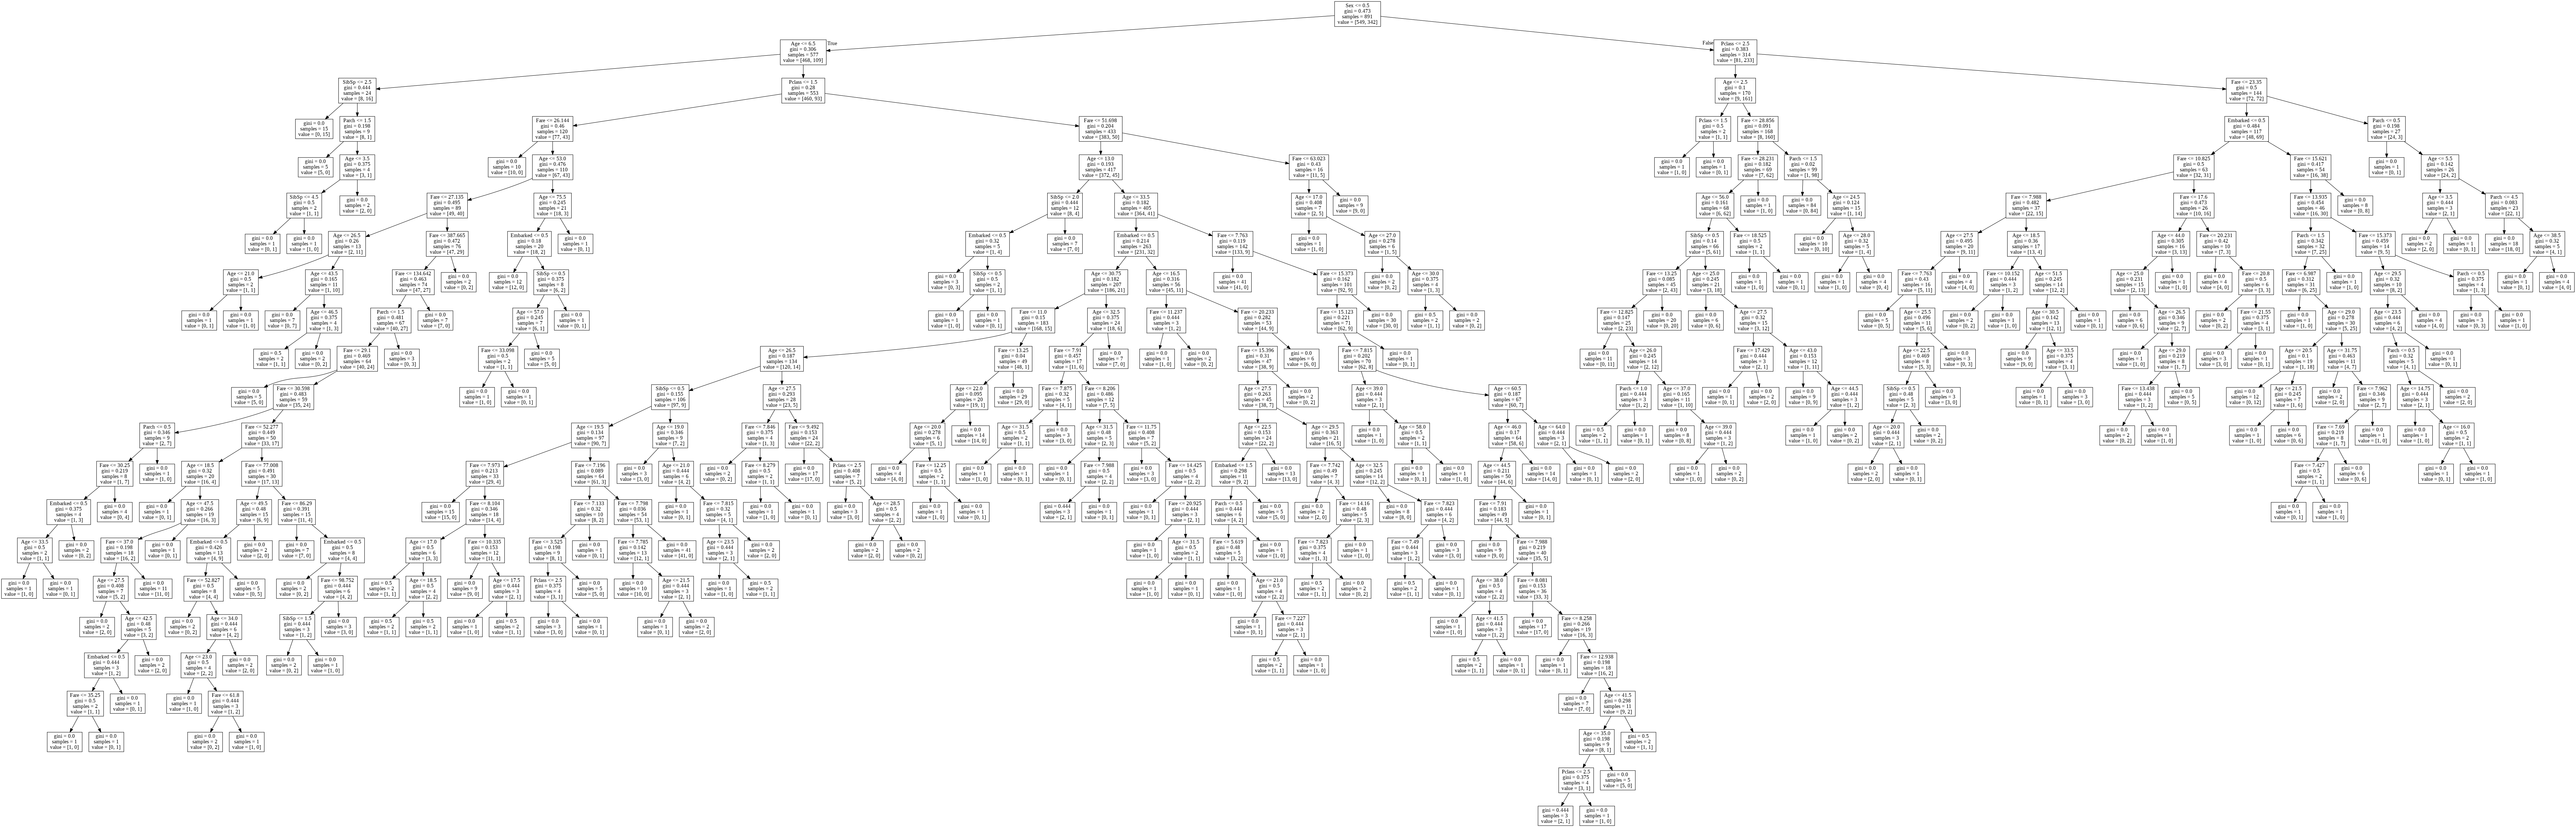

In [93]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=titanic_trainrev.columns)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [108]:
tree_pred = dt.predict(titanic_test)

In [109]:
acc_decision_tree = round(dt.score(titanic_trainrev, survival_train) * 100, 2)
acc_decision_tree

98.32

Using titanic data to create Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(titanic_trainrev, survival_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [111]:
forest_prediction = random_forest.predict(titanic_test)

In [112]:
random_forest.score(titanic_trainrev, survival_train)
acc_random_forest = round(random_forest.score(titanic_trainrev, survival_train) * 100, 2)
acc_random_forest

98.32

5-fold cross validation with decision tree

In [113]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, titanic_trainrev, survival_train, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.69832402 0.76966292 0.75842697 0.73033708 0.78651685]
Mean: 0.7486535685142177
Standard Deviation: 0.031109797851003648


5-fold cross validation with random forest

In [114]:
scores = cross_val_score(random_forest, titanic_trainrev, survival_train, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.78212291 0.79213483 0.85955056 0.79213483 0.83146067]
Mean: 0.8114807607808675
Standard Deviation: 0.029394953190188186
